In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp

In [2]:
import sys
sys.path.append("./class")
from Transport_class import Transport

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


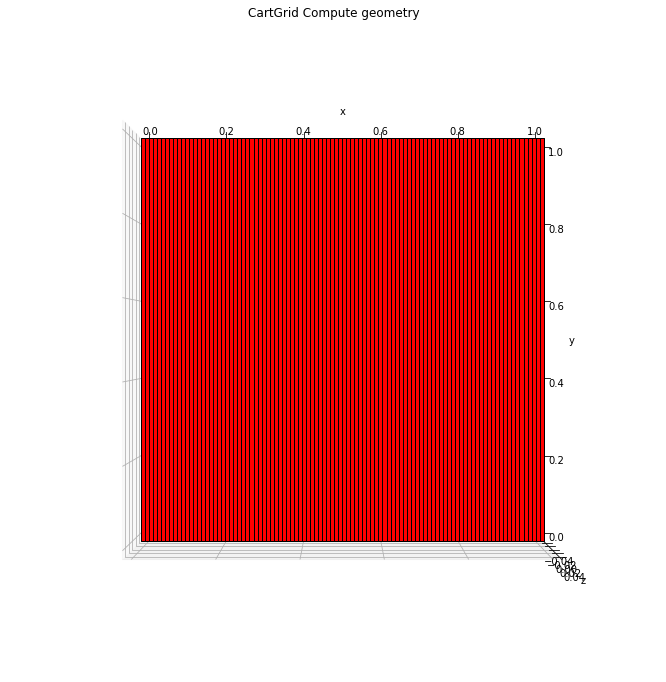

In [3]:
Nx=100
Ny=1
Lx=1.0
Ly=1.0
#phys_dims=[0.045,0.01]
phys_dims=[Lx,Ly]
g=pp.CartGrid([Nx,Ny],phys_dims)
g.compute_geometry()        
pp.plot_grid(g, figsize=(15,12))

In [4]:
unity = np.ones(g.num_cells)
empty = np.empty(0)
#porosity=0.3*unity
porosity=unity
aperture=1
bc_type=["dir","dir"]
bc_value=[0.,0.]
#bc_value=[0.38553623, 0.]
#init_cond=lambda x,y,z:int(x<0.5)
init_cond=lambda x,y,z:int(x<0.2)
#init_cond=lambda x,y,z:0.0
#init_cond=lambda x,y,z:0.00545 
print(g.num_faces)

301


In [5]:
specified_parameters = {
            "bc_type": bc_type,
            "bc_value": bc_value,
            #"time_step": 34.56,
            "time_step": 0.01,
            "mass_weight": porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            #"darcy_flux":6.67e-9*np.ones(Nx+1),
            "t_max": 1,
            #"t_max":345600,
            "method": "Implicit",
            #"method":"Explicit",
            "lambda_lin_decay":0,
            "initial_cond":init_cond,
}
print(g.num_cells)
print(g.num_faces)

100
301


In [6]:
specified_parameters["darcy_flux"][:(Nx+1)*Ny]=1.
#specified_parameters["darcy_flux"][:(Ny+1)*Nx]=6.67e-9
print("(Nx+1)*Ny")
print((Nx+1)*Ny)
print("vel")
print(specified_parameters["darcy_flux"])
vel=specified_parameters["darcy_flux"]

(Nx+1)*Ny
101
vel
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
tracer=np.zeros(g.num_cells)
transport=Transport(g,specified_parameters)
#transport.set_bc()
#transport.set_initial_cond(tracer)
#lhs,rhs_b,rhs_matrix=transport.get_transport_lhs_rhs()
delta_y=Ly/Ny
lhs,rhs_b,rhs_matrix=transport.set_and_get_matrices(tracer,delta_y)
print("tracer=")
print(tracer)
print("lhs")
print(lhs.shape)
print(lhs)
print("rhs_b")
print(rhs_b)
print("rhs_matrix")
print(rhs_matrix)

tracer=
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
lhs
(100, 100)
  (0, 0)	2.0
  (1, 0)	-1.0
  (1, 1)	2.0
  (2, 1)	-1.0
  (2, 2)	2.0
  (3, 2)	-1.0
  (3, 3)	2.0
  (4, 3)	-1.0
  (4, 4)	2.0
  (5, 4)	-1.0
  (5, 5)	1.9999999999999996
  (6, 5)	-1.0
  (6, 6)	2.000000000000001
  (7, 6)	-1.0
  (7, 7)	1.9999999999999996
  (8, 7)	-1.0
  (8, 8)	1.9999999999999996
  (9, 8)	-1.0
  (9, 9)	2.000000000000001
  (10, 9)	-1.0
  (10, 10)	1.9999999999999996
  (11, 10)	-1.0
  (11, 11)	1.9999999999999996
  (12, 11)	-1.0
  (12, 12)	2.000000000000001
  :	:
  (87, 87)	2.000000000000001
  (88, 87)	-1.0
  (88, 88)	2.000000000000001
  (89, 88)	-1.0
  (89, 89)	2.000000000000001
  (90, 89)	-1.0
  (90, 90)	2.000000000000001
  (91, 90)	-1.0
  (91, 91)	2.0000000

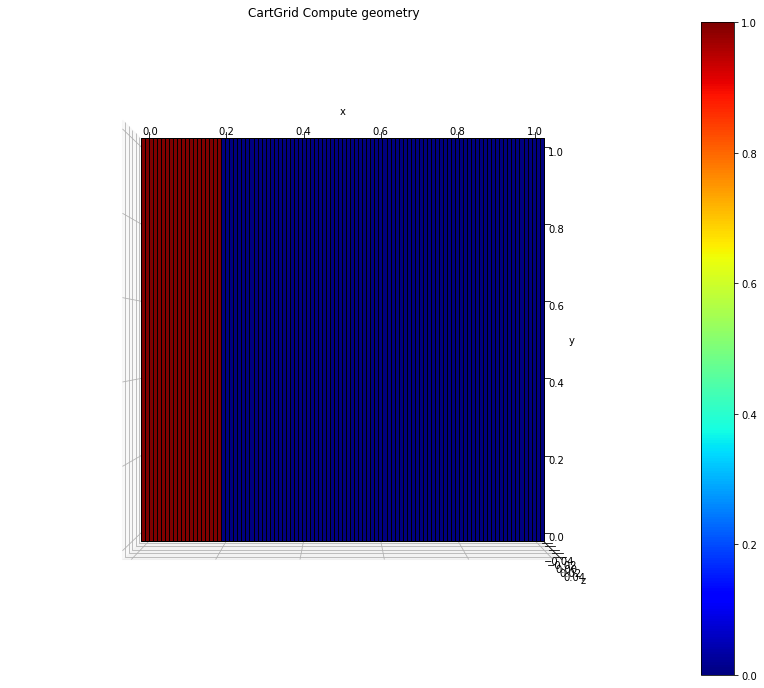

In [8]:
pp.plot_grid(g, tracer, figsize=(15, 12))

In [9]:
IEsolver = sps.linalg.factorized(lhs)

data_transport=transport.data[pp.PARAMETERS]["transport"]
n_steps = int(np.round(data_transport["t_max"] / data_transport["time_step"]))

save_every=1

# Exporter
exporter = pp.Exporter(transport.g, file_name="tracer",folder_name="solution_transport_2D")
    
for i in range(1,n_steps+1,1):
#for i in range(1,2,1):
    if np.isclose(i % save_every, 0):
        # Export existing solution (final export is taken care of below)
        exporter.write_vtu({"tracer":tracer}, time_step=int(i // save_every))
        if data_transport["method"]=="Explicit":
            tracer = IEsolver(rhs_matrix*tracer+rhs_b)
            #print(tracer)
        else:
            tracer = IEsolver(rhs_matrix*tracer+rhs_b)
            #print(tracer)
        #pp.plot_grid(g, tracer, figsize=(15, 12))
print(tracer)
exporter.write_vtu({"tracer":tracer}, time_step=(n_steps // save_every))
time_steps = np.arange(0,data_transport["t_max"] + data_transport["time_step"], save_every * data_transport["time_step"])
exporter.write_pvd(time_steps)

[7.88860905e-31 4.02319062e-29 1.03616880e-27 1.79670960e-26
 2.35952783e-25 2.50300393e-24 2.23397015e-23 1.72531840e-22
 1.17694177e-21 7.20340133e-21 4.00476059e-20 2.04268629e-19
 9.63790861e-19 4.23557894e-18 1.74395808e-17 6.76147879e-17
 2.47931939e-16 8.63131629e-16 2.86253062e-15 9.07119065e-15
 2.75419543e-14 8.03155645e-14 2.25442993e-13 6.10346172e-13
 1.59666057e-12 4.04272027e-12 9.92267149e-12 2.36425576e-11
 5.47572995e-11 1.23424316e-10 2.71058401e-10 5.80613741e-10
 1.21423483e-09 2.48147700e-09 4.96005359e-09 9.70475733e-09
 1.86010768e-08 3.49510689e-08 6.44240802e-08 1.16568636e-07
 2.07169794e-07 3.61854677e-07 6.21504245e-07 1.05022780e-06
 1.74690323e-06 2.86158304e-06 4.61841333e-06 7.34710259e-06
 1.15253979e-05 1.78354549e-05 2.72373945e-05 4.10636837e-05
 6.11382080e-05 8.99239597e-05 1.30703091e-04 1.87792601e-04
 2.66798074e-04 3.74906651e-04 5.21218674e-04 7.17115312e-04
 9.76656847e-04 1.31700333e-03 1.75884599e-03 2.32683453e-03
 3.04998172e-03 3.962023

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


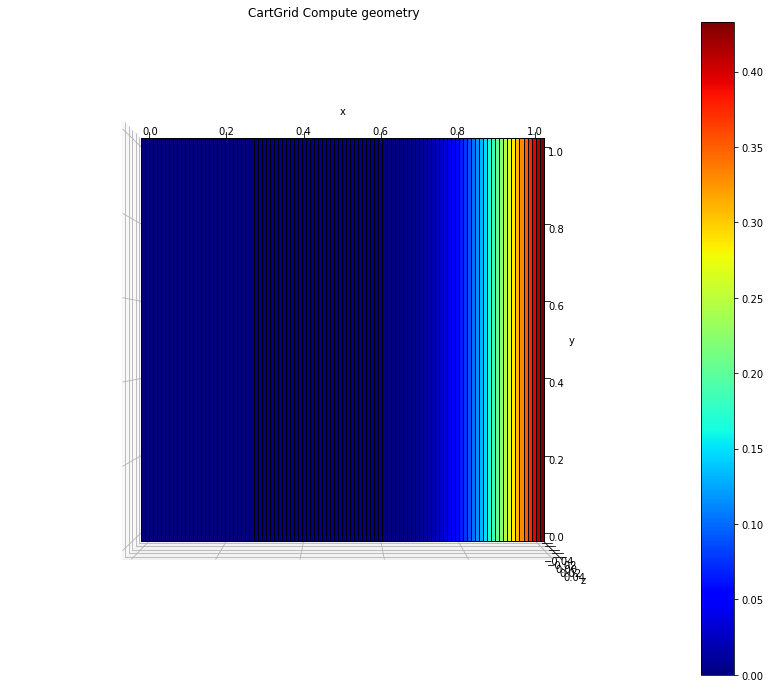

In [10]:
pp.plot_grid(g, tracer, figsize=(15, 12))